In [1]:
# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics

In [2]:
# Read the final restaurant data
# Split the "Address" column into "City", "State" and "Country"
data_df = pd.read_csv('Resources/LargeSample.csv')
data_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
data_df[["City",'State','Country','0']] = data_df['Address'].str.split(',',expand=True)
data_df[["Number",'City']] = data_df['City'].str.split(' ',expand=True, n=1)
data_df = data_df[data_df['State'].str.len() < 4].reset_index()
data_df = data_df[data_df['Ratings count'] < 15000].reset_index()
data_df

,level_0,index,Place ID,Name,Latitude,Longitude,Address,Rating,Ratings count,Price range,City,State,Country,0,Number
0,0,0,ChIJZQ6BEXZe14AR6olrRzitFFc,Subway,32.849288,-115.569706,"RCXJ+P4 Imperial, CA, USA",4.2,72,1,Imperial,CA,USA,None,RCXJ+P4
1,1,1,ChIJG3vjvDda14ARQQpdsyPpiZM,Subway,32.962409,-115.545849,"XF63+XM Brawley, CA, USA",3.9,24,1,Brawley,CA,USA,None,XF63+XM
2,2,2,ChIJ65WooQpe14ARe5yAyhIps28,Maranatha Steakhouse,32.841779,-115.568291,"RCRJ+PM Imperial, CA, USA",4.5,310,2,Imperial,CA,USA,None,RCRJ+PM
3,3,3,ChIJP646YhRa14ARqb8dCyn0i5s,Pizza Hut,32.978951,-115.547330,"XFH3+H3 Brawley, CA, USA",4.2,257,1,Brawley,CA,USA,None,XFH3+H3
4,4,4,ChIJH3Qkemla14ARaPGcgMIywEM,Little Caesars Pizza,32.978710,-115.537636,"XFH6+FW Brawley, CA, USA",4.4,193,1,Brawley,CA,USA,None,XFH6+FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17508,17515,17715,ChIJx0wNOvNRmogRSYAATJj5ooI,Subway,30.720205,-88.083563,"PWC8+3H Mobile, AL, USA",4.1,139,1,Mobile,AL,USA,None,PWC8+3H
17509,17516,17716,ChIJSYlxaD-sm4gR5BR55g4OR6Q,Subway,30.764629,-88.227389,"QQ7F+V2 Semmes, AL, USA",3.8,61,1,Semmes,AL,USA,None,QQ7F+V2
17510,17517,17717,ChIJ2UO_oSlQmogR-zLNil9KfTg,Subway,30.699927,-88.044674,"MXX4+X4 Mobile, AL, USA",3.9,136,1,Mobile,AL,USA,None,MXX4+X4
17511,17518,17718,ChIJJxuOhgFdtUwRzFzxpSoX0JQ,Subway,44.010598,-73.164324,"2R6P+67 Middlebury, VT, USA",3.9,54,1,Middlebury,VT,USA,None,2R6P+67


In [3]:
# Checking the total number of rows.
data_df.count()

level_0          17513
index            17513
Place ID         17513
Name             17513
Latitude         17513
Longitude        17513
Address          17513
Rating           17513
Ratings count    17513
Price range      17513
City             17513
State            17513
Country          17513
0                    0
Number           17513
dtype: int64

In [12]:
# Use groupby to calculate the top 10 states with the highest ratings: 

lg_state_df = data_df.groupby(['State'])['Rating'].mean().nlargest(10)
lg_state_df

State
 DC    4.337500
 NJ    4.302439
 RI    4.300000
 VT    4.297917
 MA    4.250617
 MD    4.203509
 ME    4.202959
 NH    4.202273
 ID    4.185987
 SD    4.181724
Name: Rating, dtype: float64

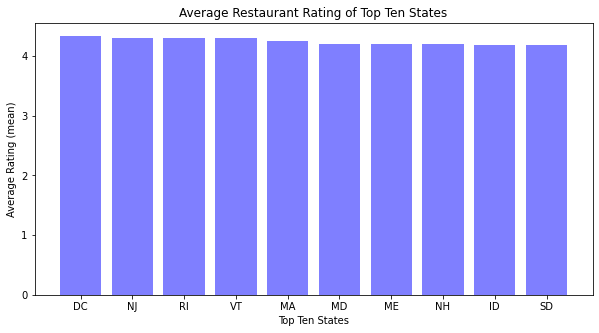

In [13]:
# Plot the 10 states with the highest ratings using a bar chart: 

x_axis = np.arange(len(lg_state_df))

fig = plt.figure(figsize=(10,5))
plt.bar(x_axis, lg_state_df, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["DC", "NJ", "RI", "VT", "MA", "MD", "ME", "NH", "ID", 
                            "SD"], rotation=0)

plt.title("Average Restaurant Rating of Top Ten States")
plt.xlabel("Top Ten States")
plt.ylabel("Average Rating (mean)")
plt.savefig("Images/top_10_state_ratings.png")

In [14]:
# Use groupby to calculate the 10 states with the lowest ratings: 

sm_state_df = data_df.groupby(['State'])['Rating'].mean().nsmallest(10)
sm_state_df

State
 NV    3.981081
 OK    4.011724
 NM    4.024576
 UT    4.032362
 WV    4.040940
 GA    4.043026
 SC    4.047773
 TX    4.062226
 IA    4.062953
 IN    4.067681
Name: Rating, dtype: float64

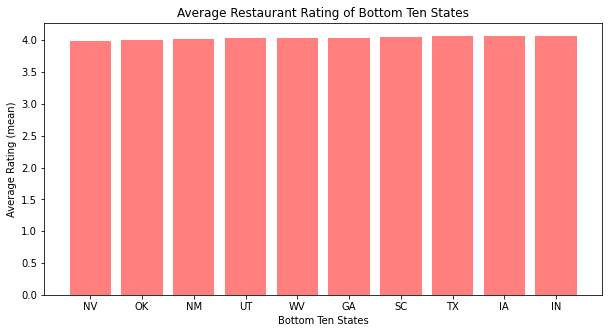

In [15]:
# Plot the 10 states with the lowest ratings using a bar chart: 

x_axis = np.arange(len(sm_state_df))

fig = plt.figure(figsize=(10,5))
plt.bar(x_axis, sm_state_df, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["NV", "OK", "NM", "UT", "WV", "GA", "SC", "TX", "IA", 
                            "IN"], rotation=0)

plt.title("Average Restaurant Rating of Bottom Ten States")
plt.xlabel("Bottom Ten States")
plt.ylabel("Average Rating (mean)")
plt.savefig("Images/bottom_10_state_ratings.png")

In [16]:
# Use groupby to calculate the 10 cities with the highest ratings  

city_df = data_df.groupby(['City'])['Rating'].mean().nlargest(10)
city_df

City
Allons             5.0
Baileyville        5.0
Bluebell           5.0
Carpentersville    5.0
Constableville     5.0
Harrington         5.0
Jetmore            5.0
Red Lake Falls     5.0
Stockdale          5.0
Apple Springs      4.9
Name: Rating, dtype: float64

Text(0, 0.5, 'Average Rating (mean)')

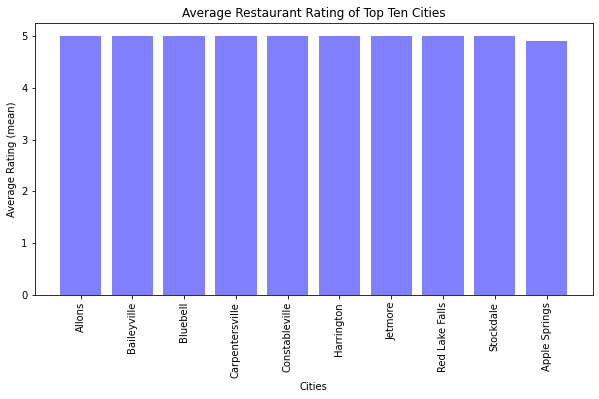

In [9]:
# Plot the 10 cities with the highest ratings using a bar chart: 

x_axis = np.arange(len(city_df))

# plt.figure(figsize=(20,3))
fig = plt.figure(figsize=(10,5))
plt.bar(x_axis, city_df, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Allons", "Baileyville", "Bluebell", "Carpentersville", "Constableville", "Harrington", "Jetmore", "Red Lake Falls", "Stockdale", 
                            "Apple Springs"], rotation=90)

plt.title("Average Restaurant Rating of Top Ten Cities")
plt.xlabel("Cities")
plt.ylabel("Average Rating (mean)")

In [10]:
# Table of State Restuarat Ratings
all_state_df = data_df.groupby(['State'])['Rating'].mean()
all_state_df

State
 AL    4.074656
 AR    4.092162
 AZ    4.091147
 CA    4.145135
 CO    4.103232
 CT    4.111111
 DC    4.337500
 DE    4.119048
 FL    4.172715
 GA    4.043026
 IA    4.062953
 ID    4.185987
 IL    4.139698
 IN    4.067681
 KS    4.105586
 KY    4.076336
 LA    4.127273
 MA    4.250617
 MD    4.203509
 ME    4.202959
 MI    4.110583
 MN    4.160650
 MO    4.109623
 MS    4.068493
 MT    4.181062
 NC    4.080090
 ND    4.091837
 NE    4.147304
 NH    4.202273
 NJ    4.302439
 NM    4.024576
 NV    3.981081
 NY    4.143854
 OH    4.109434
 OK    4.011724
 OR    4.174561
 PA    4.165986
 RI    4.300000
 SC    4.047773
 SD    4.181724
 TN    4.069944
 TX    4.062226
 UT    4.032362
 VA    4.071601
 VT    4.297917
 WA    4.098826
 WI    4.116404
 WV    4.040940
 WY    4.107547
Name: Rating, dtype: float64

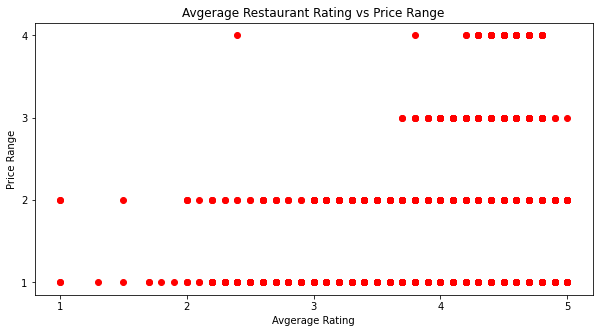

In [11]:
# Define the scatter plot variables
x_axis = data_df['Rating']
price = data_df['Price range']

# Set tick intervals
x = [1,2,3,4,5]
y = [0,1,2,3,4]

# Display the plot title and the axis labels
fig = plt.figure(figsize=(10,5))
plt.title("Avgerage Restaurant Rating vs Price Range")
plt.xlabel("Avgerage Rating")
plt.ylabel("Price Range")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(x)+1, 1.0))

# Display the scatter plot
plt.scatter(x_axis, price, marker="o", color="red")
plt.savefig("Images/ratings_vs_price.png")